## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

# Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf

In [2]:
df = pd.read_csv("./data/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Since we dont want the ID column as one of its column and it will contribute to finding the patterns in the data, we will drop it.

In [3]:
df.set_index('id', inplace=True)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


In [5]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 1

In [7]:
non_numerical_columns = df.select_dtypes(exclude=[np.number]).columns

print(non_numerical_columns)

Index(['date'], dtype='object')


Since we have a date column, it becomes a time series problem.

We will do feature engineering and add a lot of column from the "date" column.

# Adding Date Features

In [8]:
import pandas as pd

def add_date_features(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column])
    df["saleYear"] = df[date_column].dt.year
    df["saleMonth"] = df[date_column].dt.month
    df["saleDay"] = df[date_column].dt.day
    df["saleDayOfWeek"] = df[date_column].dt.dayofweek
    df["saleDayOfYear"] = df[date_column].dt.dayofyear
    df["isMonthEnd"] = df[date_column].dt.is_month_end
    df["isMonthStart"] = df[date_column].dt.is_month_start
    df["isQuarterEnd"] = df[date_column].dt.is_quarter_end
    df["isQuarterStart"] = df[date_column].dt.is_quarter_start
    df["isYearEnd"] = df[date_column].dt.is_year_end
    df["isYearStart"] = df[date_column].dt.is_year_start
    
    df.drop(columns=[date_column], inplace=True)
    
    return df

In [9]:
add_date_features(df, "date")
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,isMonthEnd,isMonthStart,isQuarterEnd,isQuarterStart,isYearEnd,isYearStart
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,10,13,0,286,False,False,False,False,False,False
6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,12,9,1,343,False,False,False,False,False,False
5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,2,25,2,56,False,False,False,False,False,False
2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,12,9,1,343,False,False,False,False,False,False
1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,2,18,2,49,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,5,21,2,141,False,False,False,False,False,False
6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,2,23,0,54,False,False,False,False,False,False
1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,6,23,0,174,False,False,False,False,False,False


In [10]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'saleYear', 'saleMonth', 'saleDay',
       'saleDayOfWeek', 'saleDayOfYear', 'isMonthEnd', 'isMonthStart',
       'isQuarterEnd', 'isQuarterStart', 'isYearEnd', 'isYearStart'],
      dtype='object')

In [11]:
df.head().T

id,7129300520,6414100192,5631500400,2487200875,1954400510
price,221900.0,538000.0,180000.0,604000.0,510000.0
bedrooms,3,3,2,4,3
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1.0,2.0,1.0,1.0,1.0
waterfront,0,0,0,0,0
view,0,0,0,0,0
condition,3,3,3,5,3
grade,7,7,6,7,8


We can see that **ZIPCODE** is a categorical feature. We can convert it to a string.
HOW? We can convert it to a string by using the **astype()** method.

In [12]:
df['zipcode'] = df['zipcode'].astype(str)
df['zipcode'].dtype

dtype('O')

## Year Renovated

In [13]:
df["renovated"] = 0
df.loc[df["yr_renovated"] > 0, "renovated"] = 1

In [14]:
df.head().T

id,7129300520,6414100192,5631500400,2487200875,1954400510
price,221900.0,538000.0,180000.0,604000.0,510000.0
bedrooms,3,3,2,4,3
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1.0,2.0,1.0,1.0,1.0
waterfront,0,0,0,0,0
view,0,0,0,0,0
condition,3,3,3,5,3
grade,7,7,6,7,8


# Exploratory Data Analysis

C:\Users\prath\AppData\Local\Temp\ipykernel_17716\4141105712.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

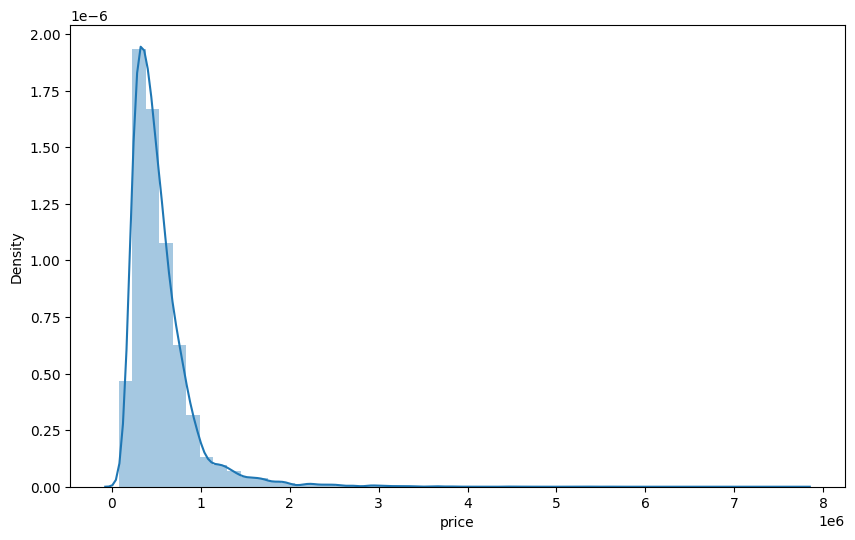

In [15]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

**NOTE**
The df.corr() is responsible in showing the correlation between the columns of the dataset. The correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together. 

* A positive correlation indicates the extent to which those variables increase or decrease in parallel; 
* a negative correlation indicates the extent to which one variable increases as the other decreases.

In [16]:
df.corr()['price'].sort_values()

zipcode          -0.053203
saleDay          -0.014670
saleDayOfYear    -0.011640
saleMonth        -0.010081
isYearEnd        -0.004434
saleDayOfWeek    -0.001695
isMonthEnd       -0.001208
saleYear          0.003576
isQuarterEnd      0.004234
long              0.021626
isQuarterStart    0.024891
isMonthStart      0.026706
condition         0.036362
yr_built          0.054012
sqft_lot15        0.082447
sqft_lot          0.089661
renovated         0.126092
yr_renovated      0.126434
floors            0.256794
waterfront        0.266369
lat               0.307003
bedrooms          0.308350
sqft_basement     0.323816
view              0.397293
bathrooms         0.525138
sqft_living15     0.585379
sqft_above        0.605567
grade             0.667434
sqft_living       0.702035
price             1.000000
isYearStart            NaN
Name: price, dtype: float64

Big Positive Correlations: sqft_living, grade, sqft_above, sqft_living15

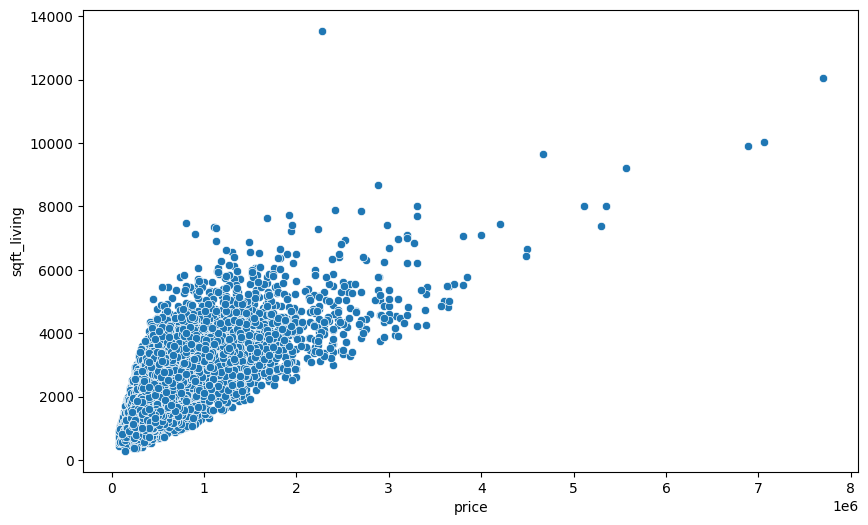

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='sqft_living',data=df);

# Train Test Split

In [18]:
X = df.drop("price", axis=1).values
y = df["price"].values

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and test/validation sets
X_train, X_testval, y_train, y_testval = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the test/validation set into separate test and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_testval, y_testval, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Training set shapes:", X_train.shape, y_train.shape)
print("Test set shapes:", X_test.shape, y_test.shape)
print("Validation set shapes:", X_val.shape, y_val.shape)


Training set shapes: (17290, 30) (17290,)
Test set shapes: (2161, 30) (2161,)
Validation set shapes: (2162, 30) (2162,)


# Scaling the Training Set

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [21]:
print(X_train.shape, X_test.shape, X_val.shape)

(17290, 30) (2161, 30) (2162, 30)


# Creating Callbacks

# Tensorboard Callbbacks

In [22]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [23]:
import datetime
import os

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("./logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

# Early Stopping Callback

In [24]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_mean_squared_error",
                                                  patience=3)

In [25]:
# Build a function to train and return a trained model
def train_model(X_train, y_train, X_val, y_val, early_stopping):
    """
    Trains a given model and returns the trained version.

    Args:
    X_train: Input training data.
    y_train: Target training data.
    X_val: Input validation data.
    y_val: Target validation data.
    early_stopping: Early stopping callback.

    Returns:
    The trained model.
    """
    # Create a model
    model = Sequential()

    # Add layers to the model
    model.add(Dense(30, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    # Create new TensorBoard session every time we train a model
    tensorboard = create_tensorboard_callback()

    # Fit the model to the data passing it the callbacks we created
    model.fit(x=X_train,
              y=y_train,
              epochs=900,
              validation_data=(X_val, y_val),
              callbacks=[tensorboard, early_stopping])

    # Return the fitted model
    return model


# Creating a Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [27]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

# Training the Model

In [28]:
model = train_model(X_train, y_train, X_val, y_val, early_stopping)

Epoch 1/900
541/541 [==============================] - 4s 4ms/step - loss: 278022946816.0000 - val_loss: 147808894976.0000
Epoch 2/900
541/541 [==============================] - 2s 4ms/step - loss: 98906537984.0000 - val_loss: 134573711360.0000
Epoch 3/900
541/541 [==============================] - 2s 4ms/step - loss: 87881023488.0000 - val_loss: 116165812224.0000
Epoch 4/900
541/541 [==============================] - 2s 4ms/step - loss: 72773042176.0000 - val_loss: 92569296896.0000
Epoch 5/900
541/541 [==============================] - 2s 4ms/step - loss: 57338126336.0000 - val_loss: 74150068224.0000
Epoch 6/900
541/541 [==============================] - 2s 4ms/step - loss: 49332932608.0000 - val_loss: 65819852800.0000
Epoch 7/900
541/541 [==============================] - 2s 3ms/step - loss: 46120869888.0000 - val_loss: 63142563840.0000
Epoch 8/900
541/541 [==============================] - 2s 3ms/step - loss: 44365123584.0000 - val_loss: 60369977344.0000
Epoch 9/900
541/541 [=======

In [29]:
# Save the entire model
model.save("./model/model_900_epochs.h5")

# Evaluation on Test Data

In [30]:
y_preds = model.predict(X_test)
y_preds

68/68 [==============================] - 0s 1ms/step


array([[ 295401.66],
       [1176210.1 ],
       [ 368833.16],
       ...,
       [ 309411.16],
       [ 653669.94],
       [ 471178.03]], dtype=float32)

In [31]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

def evaluate_regression(y_true, y_pred):
    """
    Function to evaluate regression model performance.
    
    Arguments:
    y_true -- numpy array or list, true target values.
    y_pred -- numpy array or list, predicted target values.
    
    Returns:
    A dictionary containing the following metrics:
    - Mean Absolute Error (MAE)
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)
    - Coefficient of Determination (R^2)
    - Explained Variance Score (EV)
    """
    
    metrics = {}
    
    # Calculate evaluation metrics
    metrics['MAE'] = mean_absolute_error(y_true, y_pred)
    metrics['MSE'] = mean_squared_error(y_true, y_pred)
    metrics['RMSE'] = np.sqrt(metrics['MSE'])
    metrics['R^2'] = r2_score(y_true, y_pred)
    metrics['EV'] = explained_variance_score(y_true, y_pred)
    
    return metrics


In [32]:
evaluate_regression(y_test, y_preds)

{'MAE': 79307.14153242133,
 'MSE': 22000735540.069008,
 'RMSE': 148326.4492262557,
 'R^2': 0.8141247478265055,
 'EV': 0.8161703333718593}

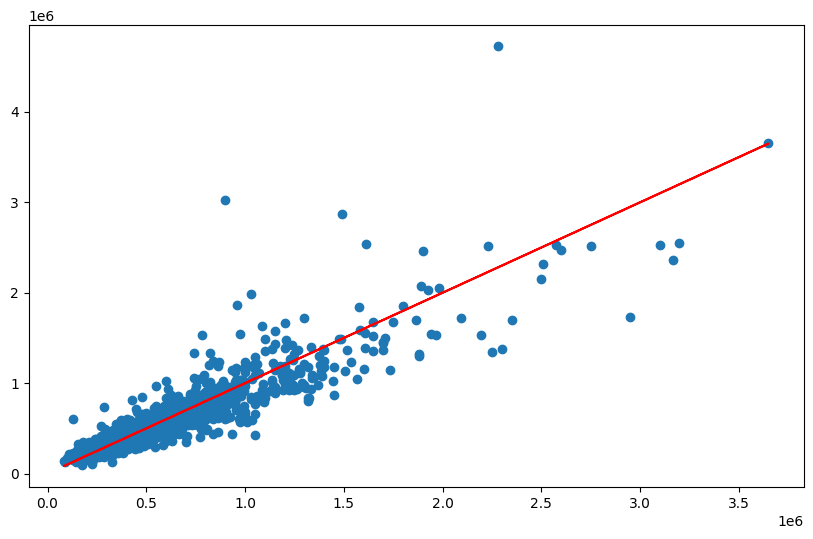

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_preds)
plt.plot(y_test,y_test,color='red')